<a href="https://colab.research.google.com/github/toledoangel/automatic-image-brightness-adjustment/blob/main/trainligthEditionDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenamiento y evaluación de un sistema de edición de luz basado en decoder y encoder**

_________________________________________________________________________________________________________________________________________________________________________________________________________
Angel Toledo Flores<br>
Ingeniero Mecánico Agrícola/Ingeniero en Sistemas Computacionales.<br>
**E-mail**: contactoangeltoledo@gmail.com<br>
 [Linkedin profile](https://www.linkedin.com/in/angel-toledo/) | [Portafolio de proyectos](https://resume.ingesaurio.com) <br> 
 [ DataSet: kagle](https://www.kaggle.com/code/shruthimshruthim/google-scrapped-image)

# Pruebas


In [ ]:
"""

def display(array1, array2, n=10):
  """
  Displays ten random images from each one of the supplied arrays.
  """
  indices = np.random.randint(len(array1), size=n)
  print(type(indices))
  images1 = array1[indices, :]
  images2 = array2[indices, :]
  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
      ax = plt.subplot(2, n, i + 1)
      #print(type(image1))
      #print(np.shape(image1))
      plt.imshow(image1.reshape(128, 128))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(image2.reshape(128, 128))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()
"""

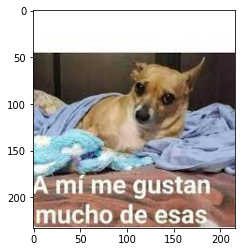

<class 'numpy.ndarray'>
____
____
[[233 233 233 ... 233 233 233]
 [233 233 233 ... 233 233 233]
 [233 233 233 ... 233 233 233]
 ...
 [207 151 128 ... 119 122 121]
 [233 221 185 ... 109 109 110]
 [233 233 233 ... 233 233 233]]
(233, 216, 3)


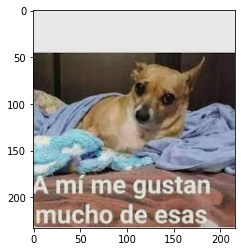

In [187]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import random

def dataset():
  print('a')

def extractValue(PATH = '/image_input'):
  pass


def convertHSVtoRGB():
  pass


def noise(array):
  """
  Añadir ruido cambiando el tipo de luz de forma random
  """
  for element in array:
    element = element* random.uniform(0.3, 1.7)

  return np.clip(array, 0.0, 1.0)


def color():
    
    src = cv.imread("/content/descarga (1).jfif")
    #print(cv.split(src))
    #print(np.shape(src))
    plt.imshow(cv.cvtColor(src,cv.COLOR_BGR2RGB))
    plt.show()
    #cv.imshow("rgbimage",src)
    hsv = cv.cvtColor(src,cv.COLOR_BGR2HSV)
    v = hsv[:,:,2] * random.uniform(0.3, 1.7)    #rando de 0.1 al 1.9 
    print(type(hsv))
    print('____')
    hsv[:,:,2] = np.clip(v, 0, 255) 
    print('____')
    print(hsv[:,:,2])

    #V = V + 10

    #print(cv.split(hsv))
    print(np.shape(hsv))
    #print(hsv[1])
    plt.imshow(cv.cvtColor(hsv,cv.COLOR_HSV2RGB))
    plt.show()
color()

#Setup

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2 as cv
import glob
import random 

from tensorflow.keras import layers 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

def splitDataset(PATH = '/content/image_input/*', test = 0.5):
  train_d = []
  test_d = glob.glob(PATH)
  for i in range(int(len(test_d)*test)):
    random_img = random.choice(test_d)
    train_d.append(random_img)
    test_d.remove(random_img)
  return train_d, test_d

def preprocess(array, px=128):
  """
  Normalizar la matriz suministrada y remodela en formato apropiado
  """
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), px, px, 1))
  return array

def display(array1, array2,n=4,px=128):
  """
  Displays ten random images from each one of the supplied arrays.
  """

  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(image1.reshape(px, px))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(image2.reshape(px, px))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()

In [2]:
def extractHSV(list_path):
  """
  Lee la imagen de path en hsv
  """
  array_V = []
  array_hsv = []
  for element in list_path:
    image = cv.imread(element)
    #Convert BGR to HSV and extract V 
    hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
    H, S, V = cv.split(hsv)
    array_V.append(V)
    array_hsv.append(hsv)

  return array_hsv, array_V

In [3]:
def Display(array1, array2, n=10):
  #print(type(array1))
  #i = 0
  for i in range(len(array1)):   
    plt.imshow(cv.cvtColor(array1[i],cv.COLOR_HSV2RGB))
    plt.show()
    plt.imshow(cv.cvtColor(array2[i],cv.COLOR_HSV2RGB))
    plt.show()
    #i += 0
    if i >= n:
      break

In [4]:

#train_data, test_data = splitDataset()
#print(train_data, test_data)

def updateHSV(hsv, V):
  """
   Sustituye V en hsv y devuelve hsv
  """
  V = V*255
  i = 0
  hsv = np.array(hsv)
  for element in V:
    hsv[i,:,:,2] = element[:,:,0]
    i += 1
  return hsv

def noise(array_V):
  """
  Modifica la luz aleatoriamente
  """
  array_VV = []
  diferencia = array_V
  for i in range(len(array_V)):
    image_noise = array_V[i] * (0.1 * random.choice([i for i in range(3,17) if i not in [9,10,11]]) )   #random.uniform(0.3, 1.7) #random.uniform(0.3, 1.7)
    image_noise = np.clip(image_noise, 0, 1.0)
    array_VV.append(image_noise)
 
  return array_VV



#Prepare the data

mkdir: cannot create directory ‘/content/image_input’: File exists


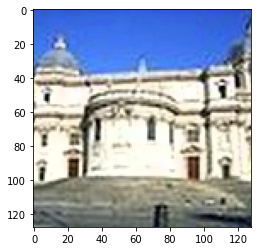

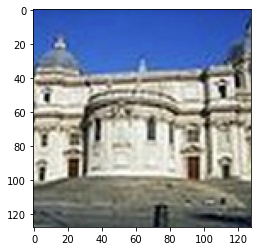

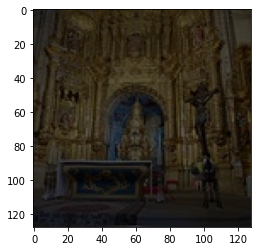

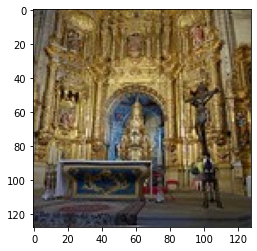

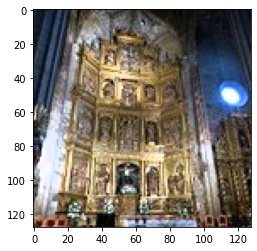

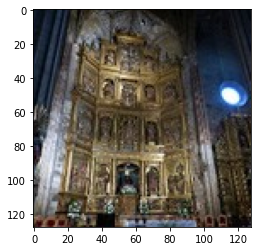

In [5]:
!mkdir /content/image_input

dataset_train, dataset_test = splitDataset()
hsv_train, train_data = extractHSV(dataset_train)
hsv_test, test_data = extractHSV(dataset_test)

# Normalize and reshape the data
train_data = preprocess(np.array(train_data),px=128)
test_data = preprocess(np.array(test_data),px=128)


# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_train_data = np.array(noisy_train_data)
noisy_test_data = noise(test_data)
noisy_test_data = np.array(noisy_test_data)

HSV_TRAIN_NOISE = updateHSV(np.array(hsv_train), noisy_train_data)
HSV_TEST_NOISE = updateHSV(np.array(hsv_test), noisy_test_data)
Display(HSV_TRAIN_NOISE, np.array(hsv_train), n=2)

#print(type(array_normal))
#print(np.shape(array_normal))
#print(type(noisy_train_data))
#print(np.shape(noisy_train_data))
#print(type(noisy_test_data))
#print(np.shape(noisy_test_data))

# Buil autoencoder

## Autoencoder Simple


In [6]:
import keras
#from keras import layers
import keras
from keras import layers

input = layers.Input(shape=(128, 128, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 64, 32)       9248  

In [7]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - val_loss: 0.6933
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6927 - val_loss: 0.6933
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6922 - val_loss: 0.6932
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6917 - val_loss: 0.6931
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6912 - val_loss: 0.6930
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6905 - val_loss: 0.6928
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6897 - val_loss: 0.6926
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6889 - val_loss: 0.6923
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6879 - val_loss: 0.6918
Epoch 10/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6867 - val_loss: 0.6913
Epoch 11/100
1/1 [===

## Autoencoder conv

In [9]:
import keras
from keras import layers

input_img = keras.Input(shape=(128, 128, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         584 

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

# Inferencias

<class 'numpy.ndarray'>
(10, 128, 128, 1)


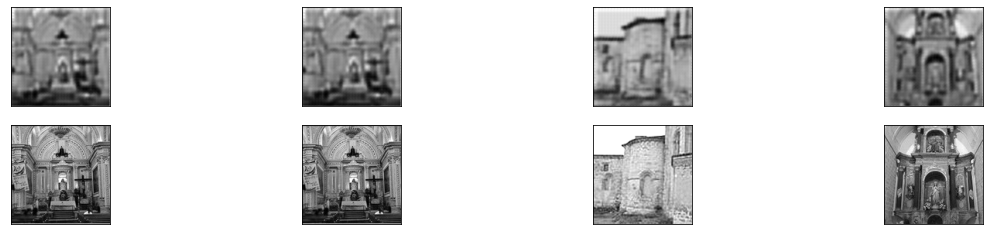

<class 'numpy.ndarray'>
(10, 128, 128, 1)


In [8]:
predictions = autoencoder.predict(noisy_test_data)
print(type(predictions))
print(np.shape(predictions))

HSV_PREDICTS = updateHSV(np.array(hsv_test), predictions)
HSV_NOISE = updateHSV(np.array(hsv_test), noisy_test_data)

display(predictions,noisy_test_data)
#plt.imshow(predictions[1])
#plt.show()
#plt.imshow(noisy_test_data[1])
#plt.show()

print(type(np.array(noisy_test_data)))
print(np.shape(noisy_test_data))
#Display(HSV_NOISE, HSV_PREDICTS, n=2)
#display(noisy_test_data, predictions)